<a href="https://colab.research.google.com/github/jhchang/Forecasting-Solar-Irradiance/blob/main/01_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

---

### 🌞 Forecasting Global Horizontal Irradiance (GHI) in Saudi Arabia

#### 🔬 **Background: What is GHI and Why Does It Matter?**

Global Horizontal Irradiance (GHI) is the total amount of shortwave solar radiation received on a horizontal surface per unit area. It consists of three main components:

* ☀️ **Direct Normal Irradiance (DNI)** – direct sunlight hitting the surface
* ☁️ **Diffuse Horizontal Irradiance (DHI)** – sunlight scattered by molecules and particles in the atmosphere
* 📐 **GHI = DHI + DNI × cos(θ)**, where θ is the solar zenith angle

Forecasting GHI is critical for:

* 📈 **Optimizing energy production** in photovoltaic (PV) solar farms
* ⚡ **Balancing grid supply and demand** in high-solar-penetration countries
* 💰 **Reducing costs** in energy trading and planning

Saudi Arabia, with its high solar potential and major investments in giga-projects like **Al Shuaibah 2**, **NEOM**, and **Vision 2030**, has a growing need for **accurate and reliable GHI forecasting models**.

---

#### 🧠 **Why Use Machine Learning (ML) for GHI Forecasting?**

Traditional models for estimating solar radiation rely on:

* Empirical regression equations
* Numerical weather prediction (NWP) models
* Satellite-based radiative transfer simulations

However, these approaches:

* Often lack **spatial or temporal precision**
* Are **computationally expensive**
* May not fully capture **local effects** like dust storms in Saudi Arabia

💡 **Machine Learning (ML)** offers a data-driven alternative:

* Learns hidden patterns from **historical GHI, temperature, wind, and humidity**
* Can make **short-term or long-term forecasts**
* Scales well to **hourly, daily, or monthly prediction tasks**

📎 **Note:**
Time Series Data is often lacking compared to other ML domains. This is due to the nature of recoding data points is limited by the passage of time. Data also has to be long before the research is actually done with the data. Researchers might have to record data for years before they have enough to feed into a model.

---

#### 🛠️ **ML Concepts Used in This Project**

To build an effective GHI forecasting model, you should be familiar with:

| Concept                   | Relevance                                                                         |
| ------------------------- | --------------------------------------------------------------------------------- |
| **Time Series Modeling**  | GHI changes with time → need to understand lag features, trends, and seasonality  |
| **Feature Engineering**   | Weather variables (temp, humidity, wind speed) affect GHI                         |
| **Supervised Regression** | Predicting a continuous value (future GHI) from past data                         |
| **Model Types**           | Linear Regression, Decision Trees, XGBoost, LSTM, or Transformers                 |
| **Evaluation Metrics**    | MAE, RMSE, MAPE are used to evaluate how close predictions are to real GHI values |

---

#### 📍 Project Focus

This project uses **hourly solar irradiance data** from NASA POWER, centered on a **Saudi Arabian solar project site**. We aim to:

1. Understand patterns in historical GHI
2. Train and evaluate ML models to forecast future GHI
3. Highlight how this approach supports Saudi Arabia’s renewable energy goals under **Vision 2030**


---

# 🌐 **Introduction to NASA POWER: A Practical Data Source for Solar Forecasting**

---



### 🔍 What is NASA POWER?

NASA’s POWER (Prediction Of Worldwide Energy Resources) project provides free, publicly accessible datasets designed for renewable energy, agriculture, and climate applications. It delivers **solar radiation**, temperature, humidity, wind, and other meteorological data at global scale with consistent formatting and long historical coverage.

### 📡 Where does NASA POWER get its data from?

NASA POWER (Prediction Of Worldwide Energy Resources) provides **surface solar radiation data** derived mainly from **satellite-based remote sensing** using models such as:

* **CERES** (Clouds and the Earth's Radiant Energy System)
* **GEOS** (Goddard Earth Observing System)
* **MERRA-2** (Modern-Era Retrospective analysis for Research and Applications)

They **simulate surface-level values** (like GHI) by applying radiative transfer models and satellite observations of clouds, aerosols, and atmospheric conditions. Some products incorporate **reanalysis data**, which merges model simulations with satellite and limited surface observations to improve accuracy.

---

### ⚠️ Limitations of NASA POWER data

| Limitation                     | Details                                                                                                  |
| ------------------------------ | -------------------------------------------------------------------------------------------------------- |
| **Resolution**                 | \~0.5° x 0.5° (\~50 km x 50 km), too coarse for microclimates or terrain-sensitive areas.                |
| **Satellite-derived**          | Doesn’t always reflect real-world obstructions (e.g., dust storms, topography, buildings).               |
| **Lack of ground calibration** | POWER doesn't use localized pyranometers or solar farms to directly validate predictions at every point. |
| **Time delay**                 | Not real-time—updated with some lag, unsuitable for real-time energy dispatch applications.              |

---

### 🧭 Why I'm Using NASA POWER for This Project

I selected NASA POWER because it provides hourly solar irradiance data across all of Saudi Arabia with a long historical record. This allows me to:

* Train ML models on high-frequency GHI data

* Study seasonal and daily solar trends

* Prototype forecasting systems for key Vision 2030 solar projects (e.g., Al Shuaibah 2, NEOM)

* Ground station data in Saudi Arabia is limited or not open access

---

### 📍 Selected Site: Al Shuaibah 2 – The Future of Solar Energy in Saudi Arabia

For this project, I am using satellite-based GHI and weather data from the geographic coordinates:

> **Latitude**: 20.7966
> **Longitude**: 39.5785

These coordinates correspond to the **future site of the Al Shuaibah 2 Solar Farm**, located in western Saudi Arabia near the Red Sea coast. This site was chosen because:

* 🏗️ It is the **planned location of the world’s largest single-site solar power facility**.
* ⚡ It represents Saudi Arabia’s most ambitious solar project to date — expected to generate over **2.6 GW** of clean energy.
* 🌞 The region receives **high solar irradiance year-round**, making it ideal for solar forecasting studies.
* 📈 It is directly aligned with the Kingdom’s **Vision 2030** goals of energy diversification and sustainability.

---

### 🌟 Why This Location Matters for ML and GHI Forecasting

By focusing on Al Shuaibah 2:

* I ensure the project is **directly relevant to Saudi Arabia's energy future**.
* It demonstrates how ML can support **large-scale renewable infrastructure planning**.
* The analysis provides insights that could scale to other **desert or high-solar-potential regions** across Saudi Arabia.

---


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Replace with your file path
file_path = "/content/drive/MyDrive/datasets/NasaPowerAlShuaibah.csv"

df = pd.read_csv(file_path)

# 🔍 Data Inspection

In [ ]:
display(df.head())

,YEAR,MO,DY,HR,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,ALLSKY_KT,ALLSKY_SRF_ALB,...,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,QV2M,T2M,T2MDEW,T2MWET,PRECTOTCORR,PS,WS10M,WD10M
0,2021,1,1,0,0.0,0.0,0.0,0.0,-999.0,-999.0,...,0.0,0.0,15.26,26.34,20.74,23.54,0.10,100.63,0.50,118.6
1,2021,1,1,1,0.0,0.0,0.0,0.0,-999.0,-999.0,...,0.0,0.0,15.18,26.25,20.67,23.46,0.09,100.61,0.80,101.6
2,2021,1,1,2,0.0,0.0,0.0,0.0,-999.0,-999.0,...,0.0,0.0,15.15,25.93,20.62,23.27,0.08,100.58,1.11,96.2
3,2021,1,1,3,0.0,0.0,0.0,0.0,-999.0,-999.0,...,0.0,0.0,15.01,25.69,20.46,23.08,4.61,100.56,1.17,99.9
4,2021,1,1,4,0.0,0.0,0.0,0.0,-999.0,-999.0,...,0.0,0.0,14.84,25.48,20.28,22.88,5.09,100.57,1.26,101.5


In [ ]:
display(df.sample(n=5, random_state=42))

,YEAR,MO,DY,HR,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,ALLSKY_KT,ALLSKY_SRF_ALB,...,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,QV2M,T2M,T2MDEW,T2MWET,PRECTOTCORR,PS,WS10M,WD10M
20041,2023,4,16,1,0.00,0.00,0.00,0.00,-999.00,-999.00,...,0.00,0.00,16.95,26.49,22.37,24.43,0.00,100.28,2.35,324.9
6289,2021,9,20,1,0.00,0.00,0.00,0.00,-999.00,-999.00,...,0.00,0.00,18.01,29.01,23.12,26.07,0.00,100.00,4.43,349.6
7428,2021,11,6,12,809.30,809.83,807.39,159.79,0.74,0.19,...,1.41,7.28,11.71,33.77,16.01,24.89,0.07,100.48,3.74,242.3
16359,2022,11,13,15,381.35,390.30,569.88,122.27,0.62,0.15,...,0.34,1.65,15.71,32.86,21.07,26.96,0.00,100.59,4.10,252.7
5816,2021,8,31,8,426.25,471.58,270.76,278.88,0.59,0.16,...,0.46,2.30,16.26,34.58,20.86,27.72,0.03,99.68,3.78,167.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 26280 non-null  int64  
 1   MO                   26280 non-null  int64  
 2   DY                   26280 non-null  int64  
 3   HR                   26280 non-null  int64  
 4   ALLSKY_SFC_SW_DWN    26280 non-null  float64
 5   CLRSKY_SFC_SW_DWN    26280 non-null  float64
 6   ALLSKY_SFC_SW_DNI    26280 non-null  float64
 7   ALLSKY_SFC_SW_DIFF   26280 non-null  float64
 8   ALLSKY_KT            26280 non-null  float64
 9   ALLSKY_SRF_ALB       26280 non-null  float64
 10  SZA                  26280 non-null  float64
 11  ALLSKY_SFC_PAR_TOT   26280 non-null  float64
 12  CLRSKY_SFC_PAR_TOT   26280 non-null  float64
 13  ALLSKY_SFC_UVA       26280 non-null  float64
 14  ALLSKY_SFC_UVB       26280 non-null  float64
 15  ALLSKY_SFC_UV_INDEX  26280 non-null 

---

### **NASA/POWER Hourly Data Request**  

#### **Time Range**  
📅 **Dates (LST):** `01/01/2021` through `12/31/2023`  

#### **Location**  
📍 **Latitude:** `21.1104°`  
📍 **Longitude:** `39.6027°`  
📍 **Elevation (MERRA-2):** `45.34 meters` *(0.5° × 0.625° region average)*  

#### **Missing Data Value**  
❌ `-999` *(if data is unavailable or out of range)*  

---

### **20 Parameters**  

#### **CERES SYN1deg Radiation Parameters**  
| Parameter | Description | Units |
|-----------|-------------|-------|
| **ALLSKY\_SFC\_SW\_DWN**   | All Sky Surface Shortwave Downward Irradiance (GHI)  | Wh/m²         |
| **CLRSKY\_SFC\_SW\_DWN**   | Clear Sky Surface Shortwave Downward Irradiance (GHI) | Wh/m²         |
| **ALLSKY\_SFC\_SW\_DNI**   | All Sky Surface Shortwave Downward Direct Normal Irradiance     | Wh/m²         |
| **ALLSKY\_SFC\_SW\_DIFF**  | All Sky Surface Shortwave Diffuse Irradiance                    | Wh/m²         |
| **ALLSKY\_KT**             | All Sky Insolation Clearness Index                              | Dimensionless |
| **ALLSKY\_SRF\_ALB**       | All Sky Surface Albedo                                          | Dimensionless |
| **SZA**                    | Solar Zenith Angle                                              | Degrees       |
| **ALLSKY\_SFC\_PAR\_TOT**  | All Sky Surface Total PAR                                       | Wh/m²         |
| **CLRSKY\_SFC\_PAR\_TOT**  | Clear Sky Surface Total PAR                                     | Wh/m²         |
| **ALLSKY\_SFC\_UVA**       | All Sky Surface UVA Irradiance                                  | Wh/m²         |
| **ALLSKY\_SFC\_UVB**       | All Sky Surface UVB Irradiance                                  | Wh/m²         |
| **ALLSKY\_SFC\_UV\_INDEX** | All Sky Surface UV Index                                        | W/m² × 40     |

#### **MERRA-2 Meteorological Parameters**  
| Parameter | Description | Units |
|-----------|-------------|-------|
| **QV2M**                   | Specific Humidity at 2 Meters (MERRA-2)                         | g/kg          |
| **T2M**                    | Temperature at 2 Meters                                         | °C            |
| **T2MDEW**                 | Dew/Frost Point at 2 Meters                                     | °C            |
| **T2MWET**                 | Wet Bulb Temperature at 2 Meters                                | °C            |
| **PRECTOTCORR**            | Precipitation (Corrected)                                       | mm/hour       |
| **PS**                     | Surface Pressure                                                | kPa           |
| **WS10M**                  | Wind Speed at 10 Meters                                         | m/s           |
| **WD10M**                  | Wind Direction at 10 Meters                                     | Degrees       |




### ⚠⚠⚠ Note:
We notice that GHI (ALLSKY_SFC_SW_DWN/CLRSKY_SFC_SW_DWN) in this case is given in units of Wh/m^2, which is not that units that Irradiance is supposed to be in. Solar irradiance is often integrated over a given time period in order to report the radiant energy emitted into the surrounding environment (joule per square metre, J/m2) during that time period. This integrated solar irradiance is called solar irradiation. So for this project we will use the terms irradiance and irradiation interchangably, but note that our time period is 1 hour.

In [ ]:
df.describe()

,YEAR,MO,DY,HR,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,ALLSKY_KT,ALLSKY_SRF_ALB,...,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,QV2M,T2M,T2MDEW,T2MWET,PRECTOTCORR,PS,WS10M,WD10M
count,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,...,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000
mean,2022.000000,6.526027,15.720548,11.500000,255.953744,267.996677,227.443301,91.919206,-486.464177,-486.671073,...,0.407131,1.491589,14.392692,30.092954,18.928719,24.510805,0.457095,100.315903,4.353933,235.569787
std,0.816512,3.447917,8.796414,6.922318,334.655512,345.790381,291.357257,113.466771,499.640810,499.439107,...,0.635833,25.683013,3.479791,4.801035,4.308818,3.674601,4.089145,0.444703,2.231339,109.831410
min,2021.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,-999.000000,...,0.000000,-999.000000,4.710000,16.810000,1.750000,10.110000,0.000000,99.080000,0.050000,0.000000
25%,2021.000000,4.000000,8.000000,5.750000,0.000000,0.000000,0.000000,0.000000,-999.000000,-999.000000,...,0.000000,0.000000,11.950000,26.820000,16.330000,22.170000,0.000000,99.930000,2.690000,165.900000
50%,2022.000000,7.000000,16.000000,11.500000,13.240000,13.965000,1.595000,14.830000,0.250000,0.090000,...,0.000000,0.000000,14.460000,30.200000,19.510000,25.120000,0.000000,100.330000,4.060000,276.000000
75%,2023.000000,10.000000,23.000000,17.250000,532.235000,578.502500,487.300000,179.675000,0.640000,0.180000,...,0.710000,3.550000,16.820000,33.270000,22.070000,27.370000,0.010000,100.680000,5.720000,327.000000
max,2023.000000,12.000000,31.000000,23.000000,1088.120000,1090.430000,1061.740000,562.010000,0.820000,0.360000,...,2.700000,16.050000,25.770000,45.180000,29.310000,32.010000,315.420000,101.560000,14.570000,359.900000


###NOTE:
Setting the index to be out datetime will be beneficial in our timeseries analysis and prediction.

In [ ]:
import pandas as pd

# Step 1: Create a datetime column
df['timestamp'] = pd.to_datetime(dict(year=df.YEAR, month=df.MO, day=df.DY, hour=df.HR))

# Step 2: Set the timestamp as the index
df = df.sort_values(by=['timestamp']).reset_index(drop=True)
df.set_index('timestamp', inplace=True)

# Step 3: (Optional but recommended): Sort the index
df = df.sort_index()

# Step 4: Dropping the unnecesseray columns
df.drop(['YEAR', 'MO', 'DY', 'HR'], axis = 1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26280 entries, 2021-01-01 00:00:00 to 2023-12-31 23:00:00
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALLSKY_SFC_SW_DWN    26280 non-null  float64
 1   CLRSKY_SFC_SW_DWN    26280 non-null  float64
 2   ALLSKY_SFC_SW_DNI    26280 non-null  float64
 3   ALLSKY_SFC_SW_DIFF   26280 non-null  float64
 4   ALLSKY_KT            26280 non-null  float64
 5   ALLSKY_SRF_ALB       26280 non-null  float64
 6   SZA                  26280 non-null  float64
 7   ALLSKY_SFC_PAR_TOT   26280 non-null  float64
 8   CLRSKY_SFC_PAR_TOT   26280 non-null  float64
 9   ALLSKY_SFC_UVA       26280 non-null  float64
 10  ALLSKY_SFC_UVB       26280 non-null  float64
 11  ALLSKY_SFC_UV_INDEX  26280 non-null  float64
 12  QV2M                 26280 non-null  float64
 13  T2M                  26280 non-null  float64
 14  T2MDEW               26280 non-null  float64
 15  T

In [ ]:
nasa_power_parameters = [
    "ALLSKY_SFC_SW_DWN",
    "CLRSKY_SFC_SW_DWN",
    "ALLSKY_SFC_SW_DNI",
    "ALLSKY_SFC_SW_DIFF",
    "ALLSKY_KT",
    "ALLSKY_SRF_ALB",
    "SZA",
    "ALLSKY_SFC_PAR_TOT",
    "CLRSKY_SFC_PAR_TOT",
    "ALLSKY_SFC_UVA",
    "ALLSKY_SFC_UVB",
    "ALLSKY_SFC_UV_INDEX",
    "QV2M",
    "T2M",
    "T2MDEW",
    "T2MWET",
    "PRECTOTCORR",
    "PS",
    "WS10M",
    "WD10M"
]

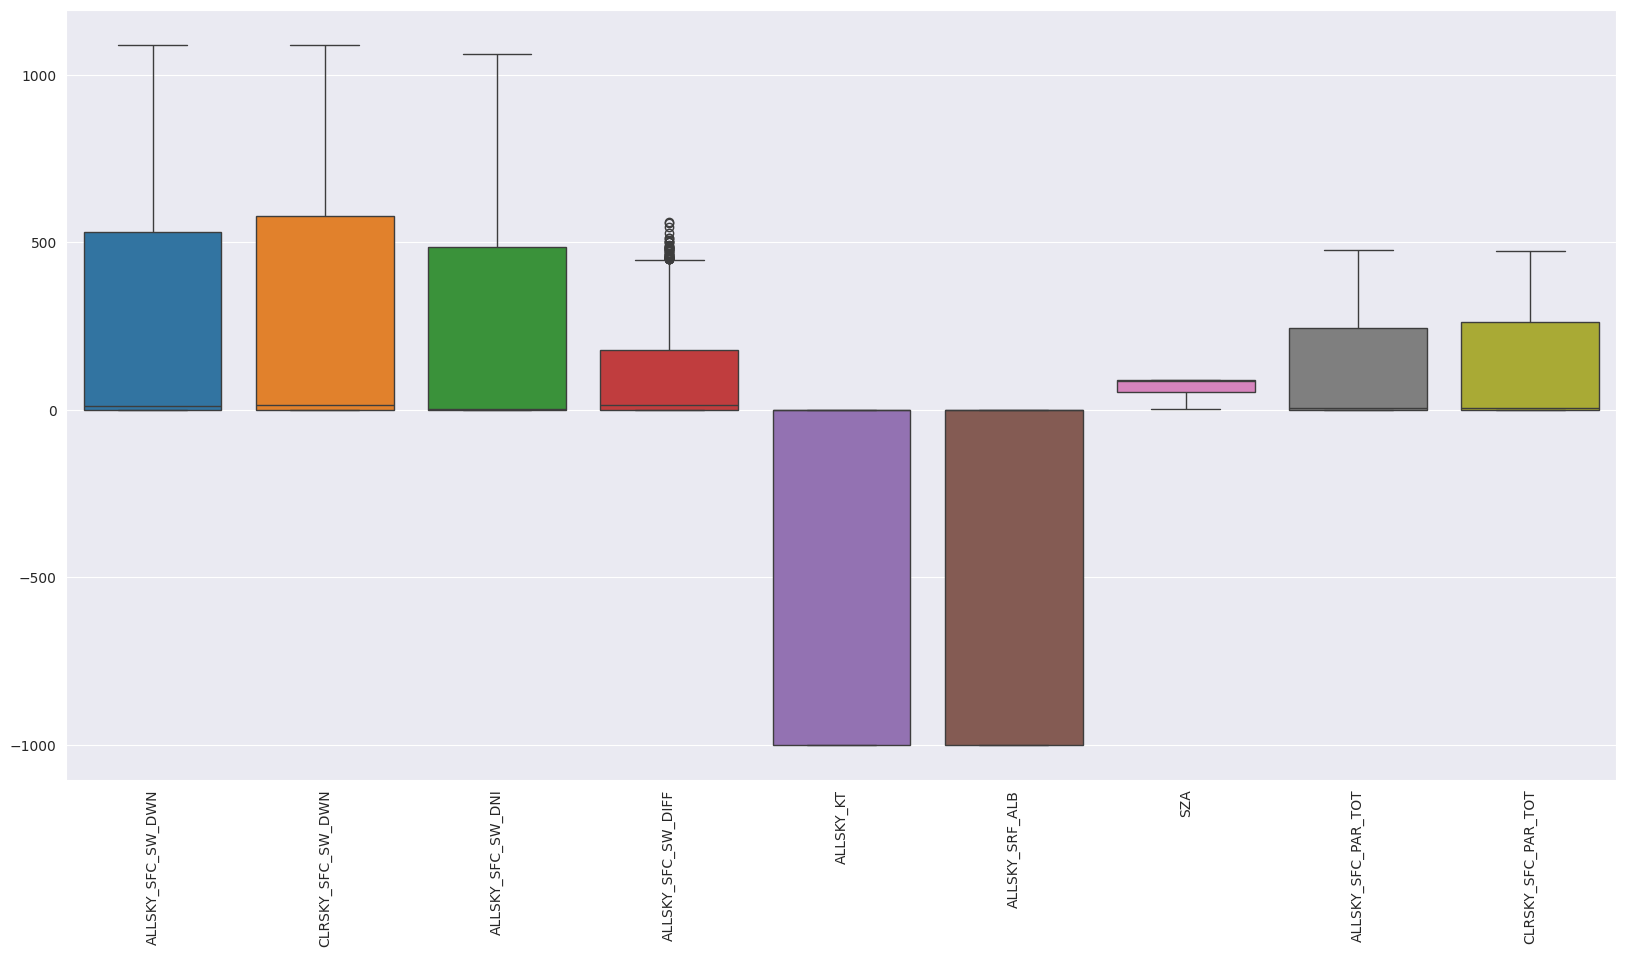

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style(style='darkgrid')



plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
# sns.boxplot(data = df)
sns.boxplot(data = df.loc[:,["ALLSKY_SFC_SW_DWN",
    "CLRSKY_SFC_SW_DWN",
    "ALLSKY_SFC_SW_DNI",
    "ALLSKY_SFC_SW_DIFF",
    "ALLSKY_KT",
    "ALLSKY_SRF_ALB",
    "SZA",
    "ALLSKY_SFC_PAR_TOT",
    "CLRSKY_SFC_PAR_TOT"]]);

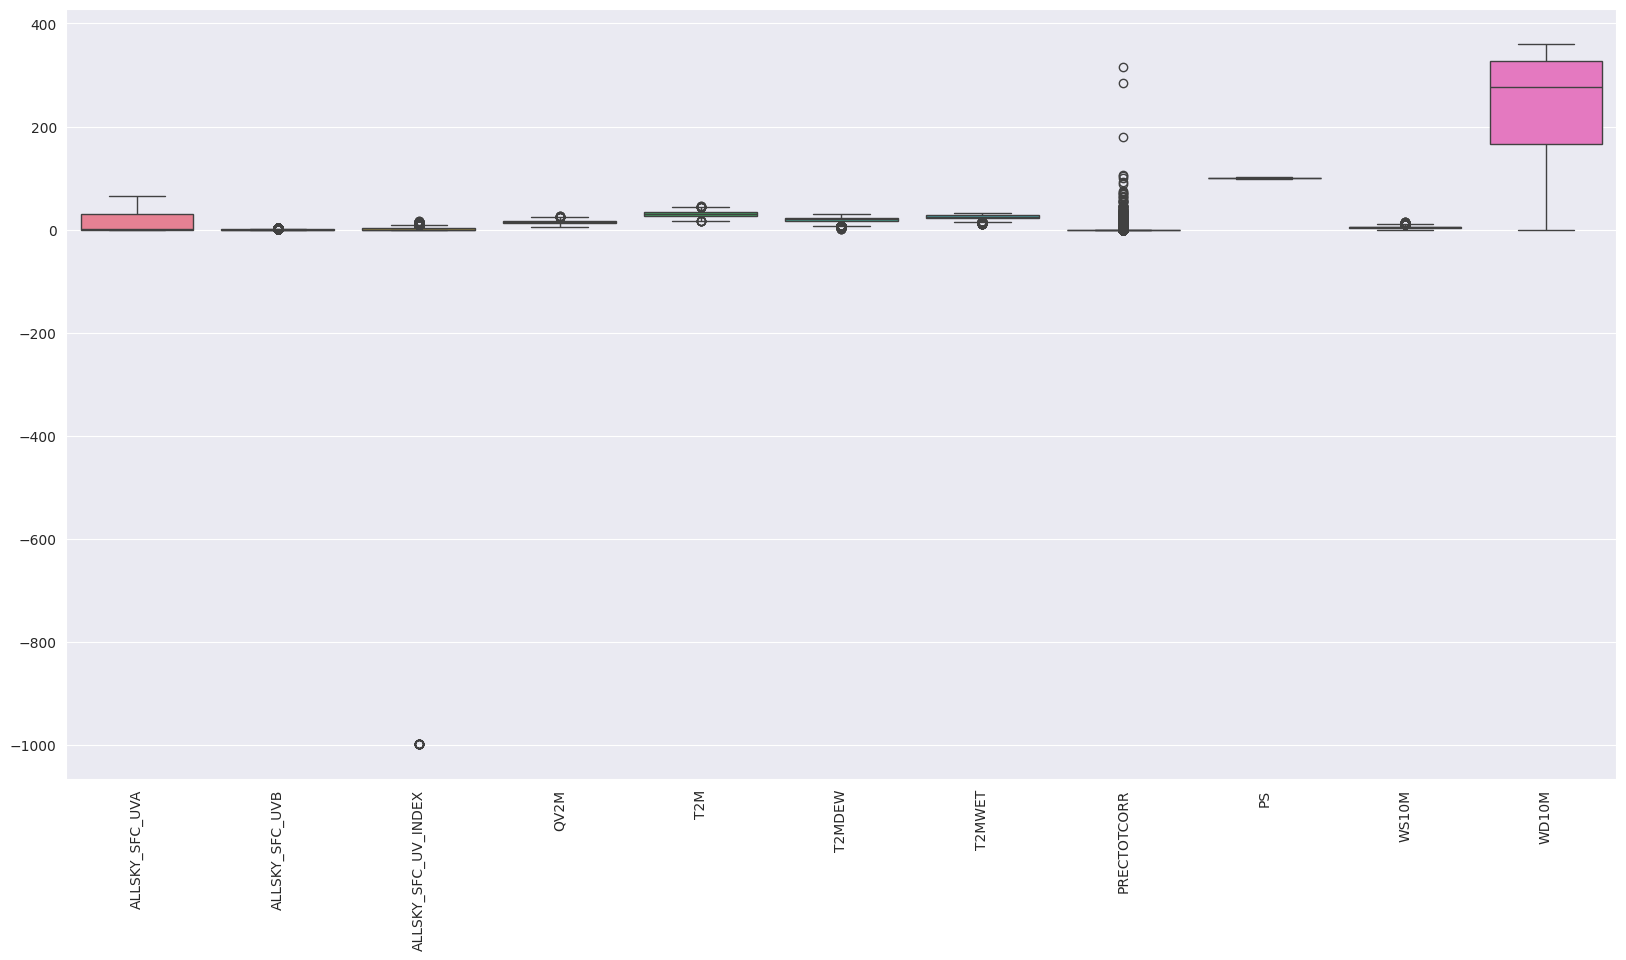

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.boxplot(data = df.loc[:,["ALLSKY_SFC_UVA",
    "ALLSKY_SFC_UVB",
    "ALLSKY_SFC_UV_INDEX",
    "QV2M",
    "T2M",
    "T2MDEW",
    "T2MWET",
    "PRECTOTCORR",
    "PS",
    "WS10M",
    "WD10M"]]);

## Preliminary Data Analysis
Looking at the box plots and the dataframe values, we notice several things:
- Most values don't go below zero and some of the ones that do are most likely the result of an error and we have to fix that
- The Radiation Parameters seem to be 0 a large portion of the time. This makes sense since the sun is not shining on Al Shuaibah all of the time and therefore the amount of power from the sun in that area would be zero.
- All Sky Surface Shortwave Diffuse Irradiance (DHI (Diffuse Horizontal Irradiance)) seems to have a lot of outliers. This makes sense because it measures irradiance that does not come directly from the sun or has been scattered by particles or clouds in the atmosphere. This implies that there are rarely high levels of sandstorms or clouds.
- PRECTOTCORR (Precipitation) also has a lot of outliers and this makes sense since it rarely rains in this region.


# 🧹 Data Cleanup

### Note:
Let's look at some context surrounding rows with invalid data.

In [ ]:
# Find problematic records
invalid = df.loc[df['ALLSKY_SFC_UV_INDEX'] < 0, :]
print(f"Total invalid records: {len(invalid)}")

# Observe rows around invalid rows
for problem_ts in invalid.index[:5]:
    time_window = pd.Timedelta(hours=3)

    # Get context (all sensors ±3 hours)
    context = df[
        (df.index >= problem_ts - time_window) &
        (df.index <= problem_ts + time_window)
    ]

    print(f"\nContext around problem at {problem_ts}:")
    display(context)
    # print(context[['ALLSKY_SFC_UV_INDEX']])


Total invalid records: 17

Context around problem at 2021-09-16 10:00:00:


,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,ALLSKY_KT,ALLSKY_SRF_ALB,SZA,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,QV2M,T2M,T2MDEW,T2MWET,PRECTOTCORR,PS,WS10M,WD10M
timestamp,,,,,,,,,,,,,,,,,,,,
2021-09-16 07:00:00,200.30,221.00,364.58,167.53,0.48,0.23,72.11,90.73,98.65,10.96,0.11,0.52,19.64,30.34,24.73,27.54,0.10,100.11,7.14,340.4
2021-09-16 08:00:00,420.25,458.58,319.93,249.38,0.59,0.15,58.34,190.53,205.75,23.12,0.44,2.20,18.95,32.17,24.12,28.14,0.04,100.14,8.38,338.4
2021-09-16 09:00:00,662.78,678.78,541.00,247.76,0.70,0.16,44.92,298.78,304.32,38.01,1.00,5.05,16.83,34.14,22.08,28.11,0.00,100.13,9.04,337.8
2021-09-16 10:00:00,768.05,801.00,490.58,319.24,0.68,0.18,32.43,351.56,364.08,44.64,1.33,-999.00,14.92,35.92,19.95,27.93,0.00,100.11,9.48,335.7
2021-09-16 11:00:00,942.03,942.95,720.86,243.02,0.76,0.19,22.54,425.29,423.37,56.35,1.92,10.40,13.75,37.17,18.50,27.83,0.00,100.04,9.88,331.9
2021-09-16 12:00:00,955.78,957.58,693.69,273.49,0.75,0.21,19.74,433.31,431.47,57.00,1.96,10.65,13.31,37.71,17.91,27.81,0.00,99.96,10.50,327.2
2021-09-16 13:00:00,887.20,889.88,633.05,282.90,0.74,0.20,26.39,404.75,403.64,52.28,1.70,9.02,13.33,37.59,17.94,27.77,0.00,99.88,11.21,324.0



Context around problem at 2021-10-18 10:00:00:


,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,ALLSKY_KT,ALLSKY_SRF_ALB,SZA,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,QV2M,T2M,T2MDEW,T2MWET,PRECTOTCORR,PS,WS10M,WD10M
timestamp,,,,,,,,,,,,,,,,,,,,
2021-10-18 07:00:00,191.73,201.10,308.89,114.45,0.53,0.23,74.83,83.95,87.50,9.63,0.08,0.38,11.34,30.10,14.11,22.10,0.0,100.31,2.44,358.8
2021-10-18 08:00:00,429.00,441.20,544.23,172.08,0.66,0.19,61.83,189.77,194.20,22.70,0.38,1.88,10.51,32.18,12.97,22.57,0.0,100.37,1.39,6.2
2021-10-18 09:00:00,638.05,651.22,648.71,210.50,0.72,0.19,49.77,284.60,288.78,36.11,0.87,4.38,10.30,34.33,13.13,23.73,0.0,100.41,0.09,215.5
2021-10-18 10:00:00,752.51,760.59,659.88,218.37,0.71,0.17,39.51,341.54,343.40,43.27,1.21,-999.00,10.46,36.16,13.45,24.80,0.0,100.42,1.24,184.6
2021-10-18 11:00:00,893.28,893.45,832.54,174.91,0.78,0.18,32.82,397.50,395.05,52.55,1.66,8.75,10.61,37.43,13.58,25.51,0.0,100.36,2.18,202.3
2021-10-18 12:00:00,895.90,896.22,833.32,171.73,0.77,0.18,32.05,401.45,399.01,52.87,1.68,8.85,10.98,38.06,14.02,26.04,0.0,100.28,3.00,225.8
2021-10-18 13:00:00,818.50,819.05,797.40,168.92,0.75,0.17,37.54,368.83,366.90,47.61,1.40,7.20,11.82,38.01,15.14,26.58,0.0,100.21,3.98,251.2



Context around problem at 2021-10-20 13:00:00:


,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,ALLSKY_KT,ALLSKY_SRF_ALB,SZA,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,QV2M,T2M,T2MDEW,T2MWET,PRECTOTCORR,PS,WS10M,WD10M
timestamp,,,,,,,,,,,,,,,,,,,,
2021-10-20 10:00:00,776.00,776.38,735.05,193.19,0.74,0.17,40.03,349.76,348.19,44.61,1.26,6.47,11.79,35.23,15.68,25.45,0.0,100.78,0.96,221.6
2021-10-20 11:00:00,863.62,864.50,773.65,198.14,0.75,0.17,33.49,387.85,386.05,50.28,1.56,8.18,11.61,36.35,15.38,25.86,0.0,100.70,2.19,223.3
2021-10-20 12:00:00,898.90,900.95,908.69,132.67,0.78,0.19,32.76,407.77,405.43,54.26,1.73,9.10,11.78,36.89,15.57,26.23,0.0,100.61,3.18,234.5
2021-10-20 13:00:00,768.05,776.20,658.99,219.62,0.71,0.17,38.19,348.60,350.45,44.19,1.24,-999.00,12.31,36.87,16.32,26.60,0.0,100.54,4.04,244.8
2021-10-20 14:00:00,690.92,691.35,877.79,100.30,0.75,0.17,47.71,314.58,312.68,40.02,1.00,5.00,13.04,36.40,17.37,26.89,0.0,100.50,4.71,254.5
2021-10-20 15:00:00,492.27,493.23,775.47,98.83,0.70,0.17,59.38,224.92,224.25,27.04,0.49,2.40,13.99,35.52,18.70,27.11,0.0,100.49,5.13,264.1
2021-10-20 16:00:00,260.65,261.85,584.34,79.38,0.62,0.16,72.15,117.85,118.15,12.70,0.12,0.60,15.09,34.31,20.11,27.21,0.0,100.51,5.35,274.6



Context around problem at 2021-11-05 13:00:00:


,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,ALLSKY_KT,ALLSKY_SRF_ALB,SZA,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,QV2M,T2M,T2MDEW,T2MWET,PRECTOTCORR,PS,WS10M,WD10M
timestamp,,,,,,,,,,,,,,,,,,,,
2021-11-05 10:00:00,726.97,730.58,742.39,179.80,0.73,0.15,44.22,325.72,325.62,41.17,1.12,5.68,13.19,32.18,18.09,25.14,0.04,100.76,1.73,281.0
2021-11-05 11:00:00,812.55,813.40,789.71,175.05,0.75,0.16,38.52,363.75,362.12,46.72,1.39,7.20,12.68,33.36,17.36,25.36,0.05,100.68,2.66,264.0
2021-11-05 12:00:00,839.05,839.47,907.07,119.49,0.77,0.17,38.01,379.28,376.67,49.60,1.50,7.82,12.81,33.91,17.47,25.69,0.05,100.58,3.83,261.0
2021-11-05 13:00:00,685.36,729.28,672.83,173.07,0.68,0.17,42.87,315.10,332.90,39.72,1.02,-999.00,13.18,33.98,17.91,25.94,0.05,100.48,4.63,261.2
2021-11-05 14:00:00,629.03,629.03,811.32,120.07,0.73,0.17,51.59,285.29,283.72,35.52,0.83,4.12,13.64,33.70,18.48,26.09,0.06,100.44,5.13,262.8
2021-11-05 15:00:00,432.90,432.92,693.84,111.49,0.68,0.17,62.58,196.65,196.03,22.98,0.38,1.88,14.11,33.12,19.09,26.11,0.06,100.42,5.23,266.1
2021-11-05 16:00:00,209.90,209.93,491.12,78.76,0.58,0.19,74.84,93.86,93.80,9.95,0.08,0.38,14.54,32.29,19.65,25.97,0.06,100.42,4.94,270.6



Context around problem at 2022-03-10 14:00:00:


,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,ALLSKY_KT,ALLSKY_SRF_ALB,SZA,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,QV2M,T2M,T2MDEW,T2MWET,PRECTOTCORR,PS,WS10M,WD10M
timestamp,,,,,,,,,,,,,,,,,,,,
2022-03-10 11:00:00,905.62,906.75,764.24,217.22,0.76,0.18,30.06,404.93,403.20,52.51,1.54,7.90,11.91,33.04,16.15,24.60,0.0,100.24,10.11,166.2
2022-03-10 12:00:00,959.08,959.40,837.96,181.99,0.77,0.17,25.90,430.86,428.16,56.85,1.75,9.07,12.20,33.45,16.56,25.01,0.0,100.15,10.29,169.5
2022-03-10 13:00:00,920.28,920.45,817.31,189.10,0.77,0.18,29.48,414.05,411.55,54.28,1.61,8.30,12.69,33.32,17.23,25.27,0.0,100.09,10.28,172.4
2022-03-10 14:00:00,750.89,769.30,572.82,260.73,0.70,0.17,38.70,338.77,345.20,42.99,1.23,-999.00,13.11,32.89,17.79,25.34,0.0,100.05,9.92,174.9
2022-03-10 15:00:00,620.40,620.88,677.00,175.60,0.71,0.17,50.55,280.82,279.93,34.69,0.72,3.53,13.30,32.21,18.04,25.12,0.0,100.05,9.26,176.7
2022-03-10 16:00:00,394.35,395.35,549.01,141.09,0.64,0.16,63.56,177.62,177.75,20.50,0.27,1.38,13.43,31.24,18.23,24.73,0.0,100.08,8.29,177.6
2022-03-10 17:00:00,160.55,161.52,347.53,78.84,0.52,0.18,77.12,71.53,71.92,7.61,0.04,0.17,13.72,29.89,18.65,24.27,0.0,100.13,6.87,179.9


### Note:
It seems like ALLSKY_SFC_UV_INDEX has 17 incidents of -999 which are missing values. These seem to be rare isolated incidents and the values in other columns and rows surrounding that value seem to follow a normal pattern. I think we can replace them with the average of the rows surrounding them.

In [ ]:
import numpy as np
import pandas as pd

col = 'ALLSKY_SFC_UV_INDEX'
error_value = -999
n = 2     # check previous and next 2 entries

# Temporarily replace error values with NaN for averaging
df['clean_col'] = df[col].replace(error_value, np.nan)

# Create centered rolling average (ignoring NaNs)
df['rolling_avg'] = df['clean_col'].rolling(window=n*2 + 1, center=True, min_periods=1).mean()

# Replace error values in original column with rolling average
df[col] = np.where(df[col] == error_value, df['rolling_avg'], df[col])

# (Optional): Convert any remaining -999 values to NaN (in case no neighbors were valid)
# df[col] = df[col].replace(error_value, np.nan)

# Drop helper columns
df.drop(columns=['clean_col', 'rolling_avg'], inplace=True)


In [ ]:
print(f"Total invalid records: {len(invalid)}")

# Observe rows around invalid rows
for problem_ts in invalid.index[:5]:
    time_window = pd.Timedelta(hours=3)

    # Get context (all sensors ±3 hours)
    context = df[
        (df.index >= problem_ts - time_window) &
        (df.index <= problem_ts + time_window)
    ]

    print(f"\nContext around problem at {problem_ts}:")
    display(context)
    # print(context[['ALLSKY_SFC_UV_INDEX']])

Total invalid records: 17

Context around problem at 2021-09-16 10:00:00:


,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,ALLSKY_KT,ALLSKY_SRF_ALB,SZA,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,QV2M,T2M,T2MDEW,T2MWET,PRECTOTCORR,PS,WS10M,WD10M
timestamp,,,,,,,,,,,,,,,,,,,,
2021-09-16 07:00:00,200.30,221.00,364.58,167.53,0.48,0.23,72.11,90.73,98.65,10.96,0.11,0.520,19.64,30.34,24.73,27.54,0.10,100.11,7.14,340.4
2021-09-16 08:00:00,420.25,458.58,319.93,249.38,0.59,0.15,58.34,190.53,205.75,23.12,0.44,2.200,18.95,32.17,24.12,28.14,0.04,100.14,8.38,338.4
2021-09-16 09:00:00,662.78,678.78,541.00,247.76,0.70,0.16,44.92,298.78,304.32,38.01,1.00,5.050,16.83,34.14,22.08,28.11,0.00,100.13,9.04,337.8
2021-09-16 10:00:00,768.05,801.00,490.58,319.24,0.68,0.18,32.43,351.56,364.08,44.64,1.33,7.075,14.92,35.92,19.95,27.93,0.00,100.11,9.48,335.7
2021-09-16 11:00:00,942.03,942.95,720.86,243.02,0.76,0.19,22.54,425.29,423.37,56.35,1.92,10.400,13.75,37.17,18.50,27.83,0.00,100.04,9.88,331.9
2021-09-16 12:00:00,955.78,957.58,693.69,273.49,0.75,0.21,19.74,433.31,431.47,57.00,1.96,10.650,13.31,37.71,17.91,27.81,0.00,99.96,10.50,327.2
2021-09-16 13:00:00,887.20,889.88,633.05,282.90,0.74,0.20,26.39,404.75,403.64,52.28,1.70,9.020,13.33,37.59,17.94,27.77,0.00,99.88,11.21,324.0



Context around problem at 2021-10-18 10:00:00:


,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,ALLSKY_KT,ALLSKY_SRF_ALB,SZA,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,QV2M,T2M,T2MDEW,T2MWET,PRECTOTCORR,PS,WS10M,WD10M
timestamp,,,,,,,,,,,,,,,,,,,,
2021-10-18 07:00:00,191.73,201.10,308.89,114.45,0.53,0.23,74.83,83.95,87.50,9.63,0.08,0.380,11.34,30.10,14.11,22.10,0.0,100.31,2.44,358.8
2021-10-18 08:00:00,429.00,441.20,544.23,172.08,0.66,0.19,61.83,189.77,194.20,22.70,0.38,1.880,10.51,32.18,12.97,22.57,0.0,100.37,1.39,6.2
2021-10-18 09:00:00,638.05,651.22,648.71,210.50,0.72,0.19,49.77,284.60,288.78,36.11,0.87,4.380,10.30,34.33,13.13,23.73,0.0,100.41,0.09,215.5
2021-10-18 10:00:00,752.51,760.59,659.88,218.37,0.71,0.17,39.51,341.54,343.40,43.27,1.21,5.965,10.46,36.16,13.45,24.80,0.0,100.42,1.24,184.6
2021-10-18 11:00:00,893.28,893.45,832.54,174.91,0.78,0.18,32.82,397.50,395.05,52.55,1.66,8.750,10.61,37.43,13.58,25.51,0.0,100.36,2.18,202.3
2021-10-18 12:00:00,895.90,896.22,833.32,171.73,0.77,0.18,32.05,401.45,399.01,52.87,1.68,8.850,10.98,38.06,14.02,26.04,0.0,100.28,3.00,225.8
2021-10-18 13:00:00,818.50,819.05,797.40,168.92,0.75,0.17,37.54,368.83,366.90,47.61,1.40,7.200,11.82,38.01,15.14,26.58,0.0,100.21,3.98,251.2



Context around problem at 2021-10-20 13:00:00:


,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,ALLSKY_KT,ALLSKY_SRF_ALB,SZA,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,QV2M,T2M,T2MDEW,T2MWET,PRECTOTCORR,PS,WS10M,WD10M
timestamp,,,,,,,,,,,,,,,,,,,,
2021-10-20 10:00:00,776.00,776.38,735.05,193.19,0.74,0.17,40.03,349.76,348.19,44.61,1.26,6.47,11.79,35.23,15.68,25.45,0.0,100.78,0.96,221.6
2021-10-20 11:00:00,863.62,864.50,773.65,198.14,0.75,0.17,33.49,387.85,386.05,50.28,1.56,8.18,11.61,36.35,15.38,25.86,0.0,100.70,2.19,223.3
2021-10-20 12:00:00,898.90,900.95,908.69,132.67,0.78,0.19,32.76,407.77,405.43,54.26,1.73,9.10,11.78,36.89,15.57,26.23,0.0,100.61,3.18,234.5
2021-10-20 13:00:00,768.05,776.20,658.99,219.62,0.71,0.17,38.19,348.60,350.45,44.19,1.24,6.17,12.31,36.87,16.32,26.60,0.0,100.54,4.04,244.8
2021-10-20 14:00:00,690.92,691.35,877.79,100.30,0.75,0.17,47.71,314.58,312.68,40.02,1.00,5.00,13.04,36.40,17.37,26.89,0.0,100.50,4.71,254.5
2021-10-20 15:00:00,492.27,493.23,775.47,98.83,0.70,0.17,59.38,224.92,224.25,27.04,0.49,2.40,13.99,35.52,18.70,27.11,0.0,100.49,5.13,264.1
2021-10-20 16:00:00,260.65,261.85,584.34,79.38,0.62,0.16,72.15,117.85,118.15,12.70,0.12,0.60,15.09,34.31,20.11,27.21,0.0,100.51,5.35,274.6



Context around problem at 2021-11-05 13:00:00:


,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,ALLSKY_KT,ALLSKY_SRF_ALB,SZA,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,QV2M,T2M,T2MDEW,T2MWET,PRECTOTCORR,PS,WS10M,WD10M
timestamp,,,,,,,,,,,,,,,,,,,,
2021-11-05 10:00:00,726.97,730.58,742.39,179.80,0.73,0.15,44.22,325.72,325.62,41.17,1.12,5.680,13.19,32.18,18.09,25.14,0.04,100.76,1.73,281.0
2021-11-05 11:00:00,812.55,813.40,789.71,175.05,0.75,0.16,38.52,363.75,362.12,46.72,1.39,7.200,12.68,33.36,17.36,25.36,0.05,100.68,2.66,264.0
2021-11-05 12:00:00,839.05,839.47,907.07,119.49,0.77,0.17,38.01,379.28,376.67,49.60,1.50,7.820,12.81,33.91,17.47,25.69,0.05,100.58,3.83,261.0
2021-11-05 13:00:00,685.36,729.28,672.83,173.07,0.68,0.17,42.87,315.10,332.90,39.72,1.02,5.255,13.18,33.98,17.91,25.94,0.05,100.48,4.63,261.2
2021-11-05 14:00:00,629.03,629.03,811.32,120.07,0.73,0.17,51.59,285.29,283.72,35.52,0.83,4.120,13.64,33.70,18.48,26.09,0.06,100.44,5.13,262.8
2021-11-05 15:00:00,432.90,432.92,693.84,111.49,0.68,0.17,62.58,196.65,196.03,22.98,0.38,1.880,14.11,33.12,19.09,26.11,0.06,100.42,5.23,266.1
2021-11-05 16:00:00,209.90,209.93,491.12,78.76,0.58,0.19,74.84,93.86,93.80,9.95,0.08,0.380,14.54,32.29,19.65,25.97,0.06,100.42,4.94,270.6



Context around problem at 2022-03-10 14:00:00:


,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,ALLSKY_KT,ALLSKY_SRF_ALB,SZA,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,QV2M,T2M,T2MDEW,T2MWET,PRECTOTCORR,PS,WS10M,WD10M
timestamp,,,,,,,,,,,,,,,,,,,,
2022-03-10 11:00:00,905.62,906.75,764.24,217.22,0.76,0.18,30.06,404.93,403.20,52.51,1.54,7.90,11.91,33.04,16.15,24.60,0.0,100.24,10.11,166.2
2022-03-10 12:00:00,959.08,959.40,837.96,181.99,0.77,0.17,25.90,430.86,428.16,56.85,1.75,9.07,12.20,33.45,16.56,25.01,0.0,100.15,10.29,169.5
2022-03-10 13:00:00,920.28,920.45,817.31,189.10,0.77,0.18,29.48,414.05,411.55,54.28,1.61,8.30,12.69,33.32,17.23,25.27,0.0,100.09,10.28,172.4
2022-03-10 14:00:00,750.89,769.30,572.82,260.73,0.70,0.17,38.70,338.77,345.20,42.99,1.23,5.57,13.11,32.89,17.79,25.34,0.0,100.05,9.92,174.9
2022-03-10 15:00:00,620.40,620.88,677.00,175.60,0.71,0.17,50.55,280.82,279.93,34.69,0.72,3.53,13.30,32.21,18.04,25.12,0.0,100.05,9.26,176.7
2022-03-10 16:00:00,394.35,395.35,549.01,141.09,0.64,0.16,63.56,177.62,177.75,20.50,0.27,1.38,13.43,31.24,18.23,24.73,0.0,100.08,8.29,177.6
2022-03-10 17:00:00,160.55,161.52,347.53,78.84,0.52,0.18,77.12,71.53,71.92,7.61,0.04,0.17,13.72,29.89,18.65,24.27,0.0,100.13,6.87,179.9


### Note:
We seemed to have fixed the issue. Let's move onto the other problem columns:

    "ALLSKY_KT",
    "ALLSKY_SRF_ALB"

In [ ]:
# Find problematic records
invalid = df.loc[df['ALLSKY_KT'] < 0, :]
print(f"Total invalid records: {len(invalid)}")

# Observe rows around invalid rows
for problem_ts in invalid.index[5:7]:
    time_window = pd.Timedelta(hours=3)

    # Get context (all sensors ±3 hours)
    context = df[
        (df.index >= problem_ts - time_window) &
        (df.index <= problem_ts + time_window)
    ]

    print(f"\nContext around problem at {problem_ts}:")
    display(context)

Total invalid records: 12805

Context around problem at 2021-01-01 05:00:00:


,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,ALLSKY_KT,ALLSKY_SRF_ALB,SZA,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,QV2M,T2M,T2MDEW,T2MWET,PRECTOTCORR,PS,WS10M,WD10M
timestamp,,,,,,,,,,,,,,,,,,,,
2021-01-01 02:00:00,0.00,0.00,0.00,0.00,-999.00,-999.00,90.00,0.00,0.00,0.00,0.00,0.00,15.15,25.93,20.62,23.27,0.08,100.58,1.11,96.2
2021-01-01 03:00:00,0.00,0.00,0.00,0.00,-999.00,-999.00,90.00,0.00,0.00,0.00,0.00,0.00,15.01,25.69,20.46,23.08,4.61,100.56,1.17,99.9
2021-01-01 04:00:00,0.00,0.00,0.00,0.00,-999.00,-999.00,90.00,0.00,0.00,0.00,0.00,0.00,14.84,25.48,20.28,22.88,5.09,100.57,1.26,101.5
2021-01-01 05:00:00,0.00,0.00,0.00,0.00,-999.00,-999.00,90.00,0.00,0.00,0.00,0.00,0.00,14.65,25.34,20.09,22.72,5.38,100.61,1.32,98.3
2021-01-01 06:00:00,0.00,0.00,0.00,0.00,-999.00,-999.00,90.00,0.00,0.00,0.00,0.00,0.00,14.43,25.18,19.84,22.51,5.23,100.66,1.41,97.7
2021-01-01 07:00:00,39.72,40.35,22.50,34.28,0.30,0.22,84.58,18.58,18.83,2.26,0.01,0.03,14.13,25.65,19.50,22.58,8.31,100.71,1.51,105.3
2021-01-01 08:00:00,203.00,205.23,214.64,126.78,0.48,0.21,72.65,93.43,94.13,10.60,0.10,0.50,14.38,26.78,19.80,23.29,14.53,100.78,1.77,132.7



Context around problem at 2021-01-01 06:00:00:


,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,ALLSKY_KT,ALLSKY_SRF_ALB,SZA,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,QV2M,T2M,T2MDEW,T2MWET,PRECTOTCORR,PS,WS10M,WD10M
timestamp,,,,,,,,,,,,,,,,,,,,
2021-01-01 03:00:00,0.00,0.00,0.00,0.00,-999.00,-999.00,90.00,0.00,0.00,0.00,0.00,0.00,15.01,25.69,20.46,23.08,4.61,100.56,1.17,99.9
2021-01-01 04:00:00,0.00,0.00,0.00,0.00,-999.00,-999.00,90.00,0.00,0.00,0.00,0.00,0.00,14.84,25.48,20.28,22.88,5.09,100.57,1.26,101.5
2021-01-01 05:00:00,0.00,0.00,0.00,0.00,-999.00,-999.00,90.00,0.00,0.00,0.00,0.00,0.00,14.65,25.34,20.09,22.72,5.38,100.61,1.32,98.3
2021-01-01 06:00:00,0.00,0.00,0.00,0.00,-999.00,-999.00,90.00,0.00,0.00,0.00,0.00,0.00,14.43,25.18,19.84,22.51,5.23,100.66,1.41,97.7
2021-01-01 07:00:00,39.72,40.35,22.50,34.28,0.30,0.22,84.58,18.58,18.83,2.26,0.01,0.03,14.13,25.65,19.50,22.58,8.31,100.71,1.51,105.3
2021-01-01 08:00:00,203.00,205.23,214.64,126.78,0.48,0.21,72.65,93.43,94.13,10.60,0.10,0.50,14.38,26.78,19.80,23.29,14.53,100.78,1.77,132.7
2021-01-01 09:00:00,367.80,389.25,309.22,205.34,0.55,0.09,61.80,170.48,179.43,20.24,0.34,1.70,14.54,27.79,19.99,23.89,9.31,100.84,2.43,161.0


In [ ]:
# Find problematic records
invalid = df.loc[df['ALLSKY_SRF_ALB'] < 0, :]
print(f"Total invalid records: {len(invalid)}")

# Observe rows around invalid rows
for problem_ts in invalid.index[5:7]:
    time_window = pd.Timedelta(hours=3)

    # Get context (all sensors ±3 hours)
    context = df[
        (df.index >= problem_ts - time_window) &
        (df.index <= problem_ts + time_window)
    ]

    print(f"\nContext around problem at {problem_ts}:")
    display(context)

Total invalid records: 12805

Context around problem at 2021-01-01 05:00:00:


,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,ALLSKY_KT,ALLSKY_SRF_ALB,SZA,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,QV2M,T2M,T2MDEW,T2MWET,PRECTOTCORR,PS,WS10M,WD10M
timestamp,,,,,,,,,,,,,,,,,,,,
2021-01-01 02:00:00,0.00,0.00,0.00,0.00,-999.00,-999.00,90.00,0.00,0.00,0.00,0.00,0.00,15.15,25.93,20.62,23.27,0.08,100.58,1.11,96.2
2021-01-01 03:00:00,0.00,0.00,0.00,0.00,-999.00,-999.00,90.00,0.00,0.00,0.00,0.00,0.00,15.01,25.69,20.46,23.08,4.61,100.56,1.17,99.9
2021-01-01 04:00:00,0.00,0.00,0.00,0.00,-999.00,-999.00,90.00,0.00,0.00,0.00,0.00,0.00,14.84,25.48,20.28,22.88,5.09,100.57,1.26,101.5
2021-01-01 05:00:00,0.00,0.00,0.00,0.00,-999.00,-999.00,90.00,0.00,0.00,0.00,0.00,0.00,14.65,25.34,20.09,22.72,5.38,100.61,1.32,98.3
2021-01-01 06:00:00,0.00,0.00,0.00,0.00,-999.00,-999.00,90.00,0.00,0.00,0.00,0.00,0.00,14.43,25.18,19.84,22.51,5.23,100.66,1.41,97.7
2021-01-01 07:00:00,39.72,40.35,22.50,34.28,0.30,0.22,84.58,18.58,18.83,2.26,0.01,0.03,14.13,25.65,19.50,22.58,8.31,100.71,1.51,105.3
2021-01-01 08:00:00,203.00,205.23,214.64,126.78,0.48,0.21,72.65,93.43,94.13,10.60,0.10,0.50,14.38,26.78,19.80,23.29,14.53,100.78,1.77,132.7



Context around problem at 2021-01-01 06:00:00:


,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,ALLSKY_KT,ALLSKY_SRF_ALB,SZA,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,QV2M,T2M,T2MDEW,T2MWET,PRECTOTCORR,PS,WS10M,WD10M
timestamp,,,,,,,,,,,,,,,,,,,,
2021-01-01 03:00:00,0.00,0.00,0.00,0.00,-999.00,-999.00,90.00,0.00,0.00,0.00,0.00,0.00,15.01,25.69,20.46,23.08,4.61,100.56,1.17,99.9
2021-01-01 04:00:00,0.00,0.00,0.00,0.00,-999.00,-999.00,90.00,0.00,0.00,0.00,0.00,0.00,14.84,25.48,20.28,22.88,5.09,100.57,1.26,101.5
2021-01-01 05:00:00,0.00,0.00,0.00,0.00,-999.00,-999.00,90.00,0.00,0.00,0.00,0.00,0.00,14.65,25.34,20.09,22.72,5.38,100.61,1.32,98.3
2021-01-01 06:00:00,0.00,0.00,0.00,0.00,-999.00,-999.00,90.00,0.00,0.00,0.00,0.00,0.00,14.43,25.18,19.84,22.51,5.23,100.66,1.41,97.7
2021-01-01 07:00:00,39.72,40.35,22.50,34.28,0.30,0.22,84.58,18.58,18.83,2.26,0.01,0.03,14.13,25.65,19.50,22.58,8.31,100.71,1.51,105.3
2021-01-01 08:00:00,203.00,205.23,214.64,126.78,0.48,0.21,72.65,93.43,94.13,10.60,0.10,0.50,14.38,26.78,19.80,23.29,14.53,100.78,1.77,132.7
2021-01-01 09:00:00,367.80,389.25,309.22,205.34,0.55,0.09,61.80,170.48,179.43,20.24,0.34,1.70,14.54,27.79,19.99,23.89,9.31,100.84,2.43,161.0


### Note:
Everytime the GHI is 0 or when the sun goes down, "ALLSKY_KT" and "ALLSKY_SRF_ALB" seem to take on the value of -999. Lets analyze what these column values mean and what values we should replace the -999 with.

## ❌ Why We Should Not Leave -999 in the Data
| Problem                    | Effect on Model                                                                                                                                                                |
| -------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Extreme Outlier**        | `-999` is wildly out of range for both features (which typically lie between 0 and 1). It will **skew model weights**, especially for distance-based or tree-based algorithms. |
| **Invalid Physics**        | These values don’t make physical sense and signal a **missing value**, not a real one.                                                                                         |
| **Bias on Nighttime Rows** | Models may learn to associate `-999` with a class or range of outputs (e.g., GHI = 0), but this is not a principled way to learn it.                                           |
| **Impact on Scaling**      | If you standardize or normalize features, `-999` will dominate the mean/std, making the feature useless.                                                                       |


---

## ☀️ What the Columns Mean

### 🔹 **ALLSKY\_KT** — All Sky Insolation Clearness Index

* Defined as:

  $$
  K_T = \frac{\text{GHI}}{\text{Extraterrestrial Solar Radiation on Horizontal Surface}}
  $$
* It's a **dimensionless ratio** between **measured GHI** and **potential GHI** if there were no atmosphere.
* Ranges from:

  * \~0 (cloudy, dusty)
  * to \~1 (very clear skies)
* **At night**: GHI = 0 → KT is undefined → often recorded as `-999`

---

### 🔹 **ALLSKY\_SRF\_ALB** — All Sky Surface Albedo

* Fraction of solar radiation **reflected by the Earth's surface**.
* Ranges from:

  * 0 (no reflection, like water)
  * to 1 (perfect reflection, like fresh snow)
* **At night**: No incoming radiation → no albedo → value is meaningless → set to `-999`

---


## 🛠️ How to Handle `-999` in These Columns

Since `-999` is a placeholder for “**not physically meaningful because the sun is down**,” you don’t want to impute with surrounding values (e.g., day values). That would distort nighttime behavior.

- We can replace KT with 0 since it is conceptually correct at night (no solar radiation).
- We can replace Albedo with 0 since there is no incoming reflected radiation.

In [ ]:
# Replace -999 for ALLSKY_KT with 0 during nighttime
df['ALLSKY_KT'] = df['ALLSKY_KT'].replace(-999, 0.0)

# Replace -999 for ALLSKY_SRF_ALB with 0 or np.nan
df['ALLSKY_SRF_ALB'] = df['ALLSKY_SRF_ALB'].replace(-999, 0.0)

## Inspection of the cleaned data:
Let us run through some basic data analysis and box plots to see what the model looks like now.

In [ ]:
df.describe()

,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,ALLSKY_KT,ALLSKY_SRF_ALB,SZA,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,QV2M,T2M,T2MDEW,T2MWET,PRECTOTCORR,PS,WS10M,WD10M
count,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000
mean,255.953744,267.996677,227.443301,91.919206,0.301234,0.094338,70.820131,116.685575,121.347538,14.706566,0.407131,2.142585,14.392692,30.092954,18.928719,24.510805,0.457095,100.315903,4.353933,235.569787
std,334.655512,345.790381,291.357257,113.466771,0.314373,0.097795,24.710710,152.404515,156.518628,19.657537,0.635833,3.417422,3.479791,4.801035,4.308818,3.674601,4.089145,0.444703,2.231339,109.831410
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.060000,0.000000,0.000000,0.000000,0.000000,0.000000,4.710000,16.810000,1.750000,10.110000,0.000000,99.080000,0.050000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.460000,0.000000,0.000000,0.000000,0.000000,0.000000,11.950000,26.820000,16.330000,22.170000,0.000000,99.930000,2.690000,165.900000
50%,13.240000,13.965000,1.595000,14.830000,0.250000,0.090000,87.875000,5.800000,6.110000,0.720000,0.000000,0.030000,14.460000,30.200000,19.510000,25.120000,0.000000,100.330000,4.060000,276.000000
75%,532.235000,578.502500,487.300000,179.675000,0.640000,0.180000,90.000000,244.907500,264.055000,30.200000,0.710000,3.580000,16.820000,33.270000,22.070000,27.370000,0.010000,100.680000,5.720000,327.000000
max,1088.120000,1090.430000,1061.740000,562.010000,0.820000,0.360000,90.000000,478.720000,475.260000,65.580000,2.700000,16.050000,25.770000,45.180000,29.310000,32.010000,315.420000,101.560000,14.570000,359.900000


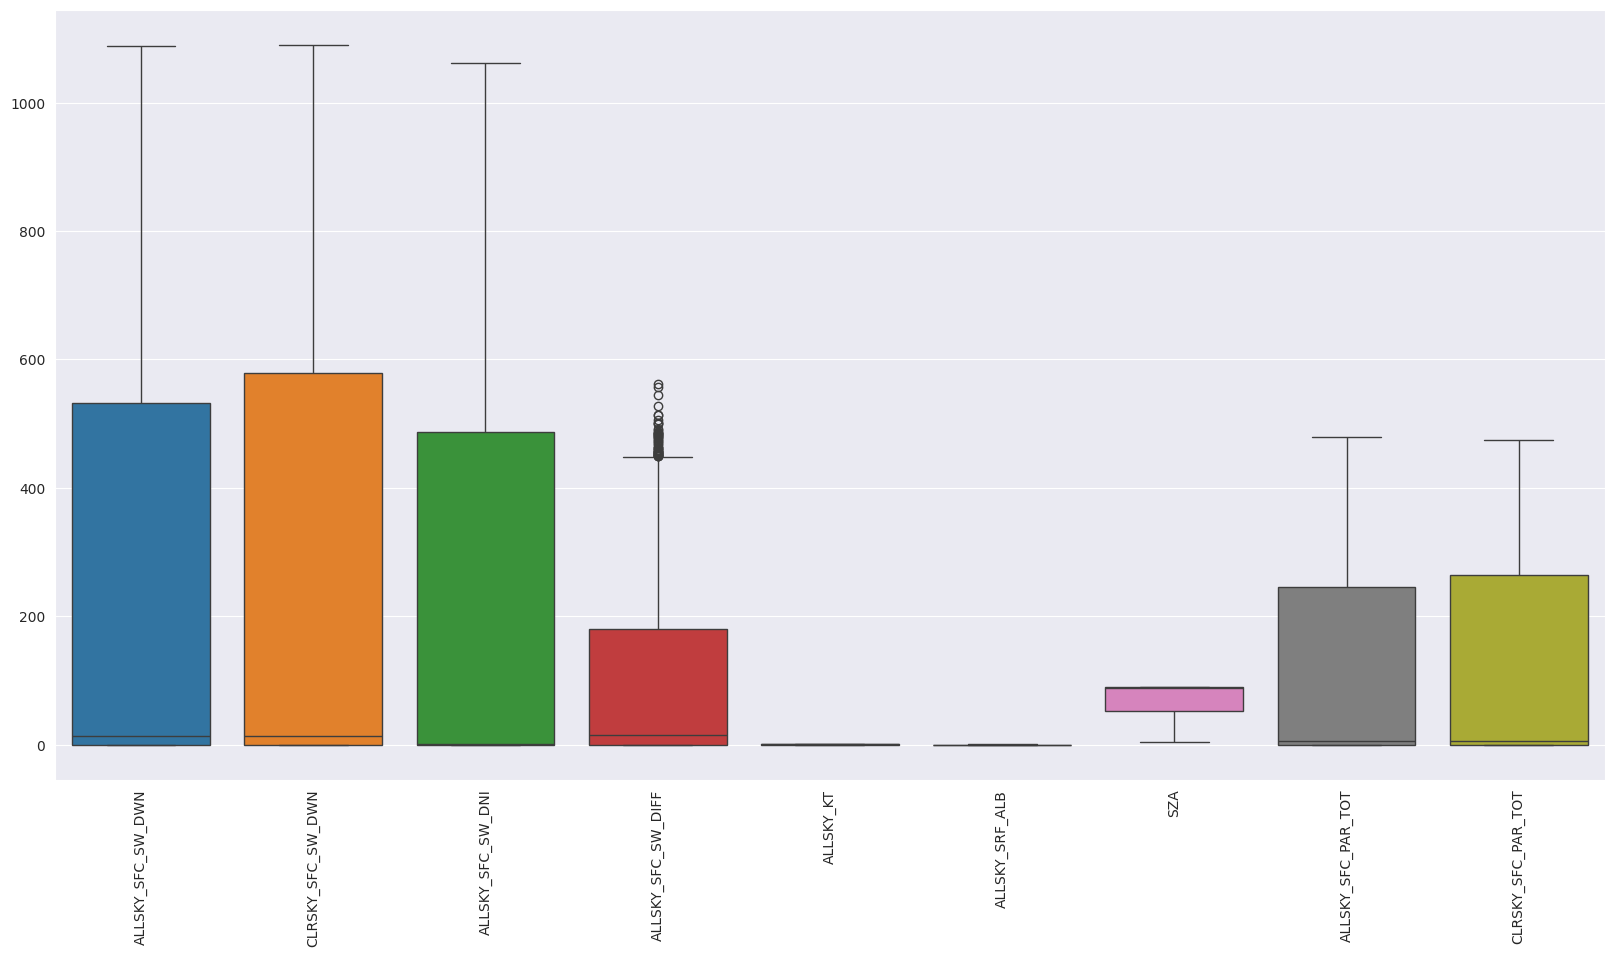

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style(style='darkgrid')



plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
# sns.boxplot(data = df)
sns.boxplot(data = df.loc[:,["ALLSKY_SFC_SW_DWN",
    "CLRSKY_SFC_SW_DWN",
    "ALLSKY_SFC_SW_DNI",
    "ALLSKY_SFC_SW_DIFF",
    "ALLSKY_KT",
    "ALLSKY_SRF_ALB",
    "SZA",
    "ALLSKY_SFC_PAR_TOT",
    "CLRSKY_SFC_PAR_TOT"]]);

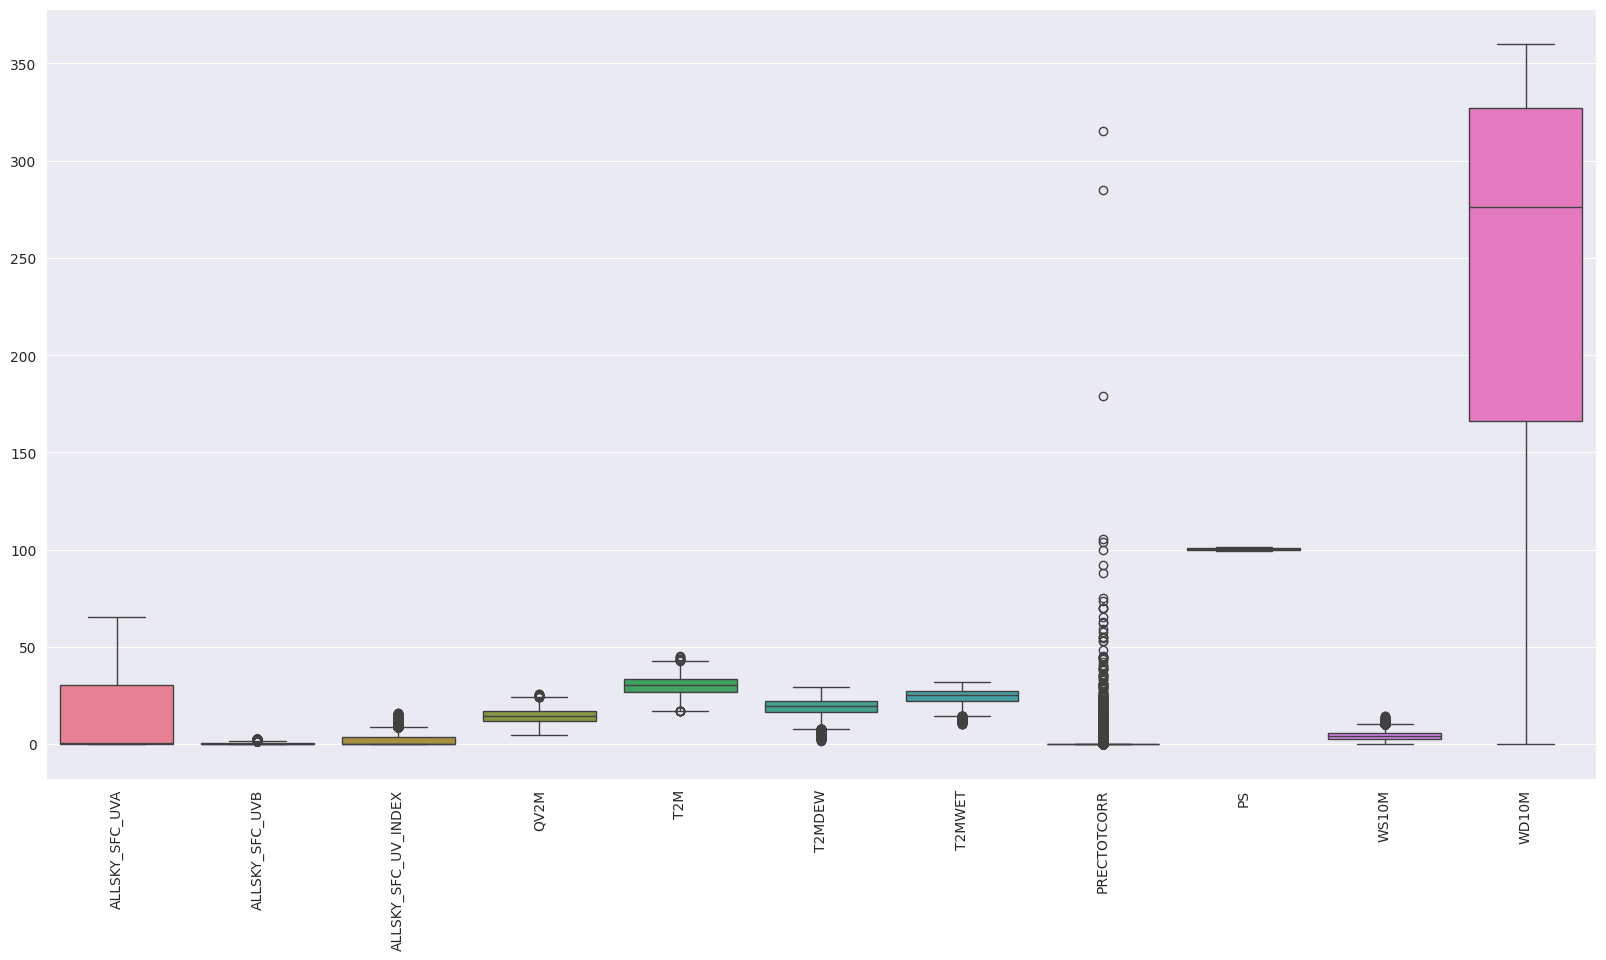

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.boxplot(data = df.loc[:,["ALLSKY_SFC_UVA",
    "ALLSKY_SFC_UVB",
    "ALLSKY_SFC_UV_INDEX",
    "QV2M",
    "T2M",
    "T2MDEW",
    "T2MWET",
    "PRECTOTCORR",
    "PS",
    "WS10M",
    "WD10M"]]);

## We still have outliers. Should we remove them?

---

### 🧭 Here’s how to think about it:

| Type of Outlier                                                                                    | Should You Remove It? | Why                                                                                                                                   |
| -------------------------------------------------------------------------------------------------- | --------------------- | ------------------------------------------------------------------------------------------------------------------------------------- |
| **Sensor Error / Corruption** (e.g., `-999`, `NaN`, sudden drop to `0` when the sun is up)         | ✅ Yes                 | These values are **not real** and can distort training — treat or impute.                                                             |
| **Rare but Real Events** (e.g., dust storms, sudden cloud cover, spike in humidity, GHI spike/dip) | ❌ No                  | These are **exactly the events** your model should learn to **predict or adapt to**. Removing them would lead to poor generalization. |

---

### ✅ Real-World Weather Outliers Are Often Meaningful

* A sudden drop in **GHI** might be due to a **passing cloud** or **dust storm** — important for PV forecasting.
* A spike in **humidity** might be tied to **fog** or a **storm front**.
* **Wind speed** can vary erratically but has real effects on **air temperature** and **PV panel cooling**.

These are not noise — they’re **signal**.

---

### 🛠 What You Should Do Instead

1. **Distinguish between real vs. bad data**

   * Replace invalid placeholders (like `-999`) or impossible values (e.g., humidity > 100%).
   * Keep sharp but realistic changes (even if they “look like” outliers).

2. **Use domain-aware bounds**

   * E.g., temperature in Riyadh shouldn’t drop below -5°C or exceed 55°C.
   * UV Index > 15 might be impossible — cap it.

3. **Add robust preprocessing instead of deletion**

   * Use **robust scalers** (e.g., `RobustScaler` or `QuantileTransformer`) instead of `StandardScaler`.
   * Train models that **handle non-Gaussian data** (e.g., tree-based models, not plain linear regression).

4. **Mark unusual events**

   * If you can, flag dust storm days, heat waves, etc. using a new feature. This can improve ML understanding.

---


# Saving the cleaned data for ML models

In [ ]:
# Save to CSV, keeping the datetime index
df.to_csv("cleaned_weather_data.csv", index=True)

# ⚓ Conclusion

---

In this section, we performed essential data cleaning and transformation steps to prepare the NASA POWER weather dataset for reliable machine learning modeling. These steps ensure that the dataset is both physically meaningful and computationally robust.

#### Key actions taken:

* 🔍 **Replaced placeholder error values** (`-999`) across multiple features with either:

  * Domain-appropriate defaults (e.g., `0` for `ALLSKY_KT` and `ALLSKY_SRF_ALB` at night)
  * Rolling averages from surrounding time steps (for features with unexpected anomalies)
* 📉 **Dropped or interpolated missing values** where necessary to maintain time continuity
* 📆 **Preserved the `DatetimeIndex`** for accurate time-based modeling and analysis
* 🔧 **Filtered or capped outliers** only when physically unrealistic (e.g., values beyond known atmospheric limits)

These preprocessing steps are critical for maintaining the **integrity of the dataset** and ensuring that the machine learning model:

* Learns from **real-world weather patterns**, not from sensor noise
* Handles **day-night transitions and irradiance drop-offs** gracefully
* Is not biased or destabilized by extreme placeholder values

This cleaned dataset now forms a solid foundation for **exploratory analysis**, **feature engineering**, and **predictive modeling** in the next stages of the project.